# Step 1: 

### import the library

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
%matplotlib inline 

# Step 2:

### Get the knowledge about Dataset

In [4]:
print(os.listdir())

['911DataAnalysis.ipynb', '911.csv', '.ipynb_checkpoints']


### check the rows and column

In [6]:
df = pd.read_csv("911.csv")
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1


### check the list of columns

In [7]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

###  Info about the  Dataset 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


### Describe about dataset 

In [9]:
df.describe()

,lat,lng,zip,e
count,423909.000000,423909.000000,371780.000000,423909.0
mean,40.158618,-75.314022,19234.732269,1.0
std,0.129170,0.656048,301.388898,0.0
min,0.000000,-119.698206,3366.000000,1.0
25%,40.099784,-75.391547,19038.000000,1.0
50%,40.143900,-75.304563,19401.000000,1.0
75%,40.229008,-75.210760,19446.000000,1.0
max,51.335390,87.854975,77316.000000,1.0


# Questions

## Q 1A) what are top 5 zip code for 911 Call

In [16]:
df["zip"].nunique()

170

In [18]:
df["zip"].value_counts().head(5)

19401.0    28656
19464.0    27948
19403.0    21631
19446.0    20496
19406.0    14097
Name: zip, dtype: int64

## Q1B) what are Top 5 Township for 911 Call

In [19]:
df["twp"].value_counts().head(5)

LOWER MERION    36441
ABINGTON        25835
NORRISTOWN      23883
UPPER MERION    22694
CHELTENHAM      19629
Name: twp, dtype: int64

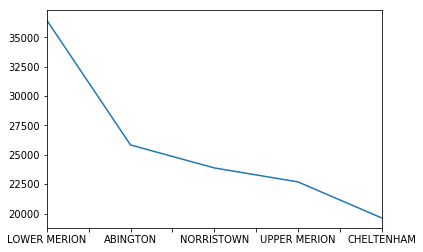

In [123]:
df["twp"].value_counts().head(5).plot()

### Conclusion: Top 5 Township for 911 Calls are LOWER MERION , ABINGTON, NORRISTOWN, UPPER MERION    , CHELTENHAM   and top 5 Zip code for 911 Call are 19401, 19464, 19403, 19446, 19406

## Q1 C how many Unique types of call came  and what are top 5

In [21]:
df["title"].nunique()

141

In [36]:
df["title"].value_counts().head(5)

Traffic: VEHICLE ACCIDENT -    98401
Traffic: DISABLED VEHICLE -    31871
Fire: FIRE ALARM               24380
EMS: FALL VICTIM               21253
EMS: RESPIRATORY EMERGENCY     21158
Name: title, dtype: int64

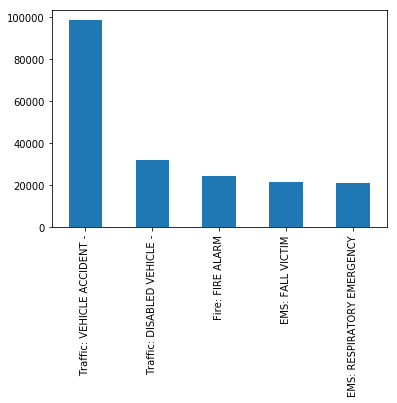

In [47]:
df["title"].value_counts().head(5).plot.bar()

### Conculsion : There are Total 141 Unique title or types pof complain and top 5 most received complain are as folow they are Traffic: VEHICLE ACCIDENT  reported 98401 complains and Traffic: DISABLED VEHICLE, Fire: FIRE ALARM, EMS: FALL VICTIM, EMS: RESPIRATORY EMERGENCY  are the top complains recieved 

## Q 1D ) What is Most common reason for calling 911

In [54]:
df["Reason"] = df["title"].apply(lambda title: title.split()[0])
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS:
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS:


In [57]:
df["Reason"].unique()

array(['EMS:', 'Fire:', 'Traffic:'], dtype=object)

In [59]:
df["Reason"].value_counts()

EMS:        208676
Traffic:    151458
Fire:        63775
Name: Reason, dtype: int64

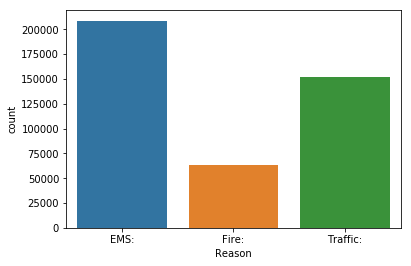

In [60]:
sns.countplot(x=df["Reason"], data=df)

### Conculsion:  That means most of the call 911 are for EMS that is some kind of injury or emergency

## Time Stamp

### Processing Dataset for Time

In [106]:
df["timeStamp"] = pd.to_datetime(df["timeStamp"])
df["Year"] = pd.DatetimeIndex(df['timeStamp']).year
df["Month"] = pd.DatetimeIndex(df["timeStamp"]).month
df["Time"] = pd.DatetimeIndex(df["timeStamp"]).time
df["DayOfWeek"] = pd.DatetimeIndex(df["timeStamp"]).dayofweek
df["Date"] = pd.DatetimeIndex(df["timeStamp"]).date
df["DayOfWeek"] = df["DayOfWeek"].map({0:'Mon',
                                      1:'Tue',
                                      2:"Wed",
                                      3:"Thur",
                                      4:"Fri",
                                      5:"Sat",
                                      "6":"Sun"})
df.head(1)


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Year,Month,Time,DayOfWeek,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS:,2015,12,17:10:52,Thur,2015-12-10


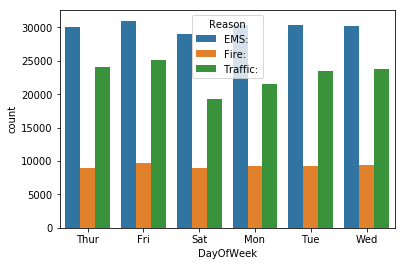

In [83]:
sns.countplot(x="DayOfWeek",
             data=df,
             hue="Reason")

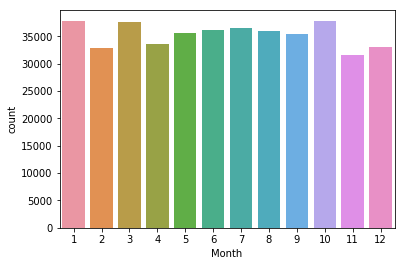

In [92]:
sns.countplot(x="Month",
             data=df)


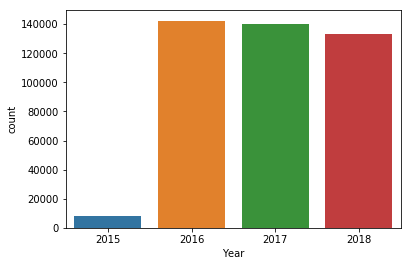

In [94]:
sns.countplot(x="Year",
             data=df)

### Conclusion: Maximum call for EMS emergency call are on Friday and maximum call were in Month of Jan. March and october and Maximum call was recieved in Year 2016